In [1]:
import cv2
import datetime
import numpy as np

from keras.models import load_model
from tensorflow.keras.models import Model, Sequential

In [2]:
from keras.models import model_from_json 
vgg_json_file = open("vgg_model.json", "r")
lstm_json_file = open("lstm_model.json", "r")

vgg_loaded_model_json = vgg_json_file.read() 
vgg_json_file.close()
lstm_loaded_model_json = lstm_json_file.read() 
lstm_json_file.close()

vgg_loaded_model = model_from_json(vgg_loaded_model_json)
lstm_loaded_model = model_from_json(lstm_loaded_model_json)

vgg_loaded_model.load_weights("vgg_model_weight.h5")
lstm_loaded_model.load_weights("lstm_model_weight.h5")
print("Loaded model from disk")

vgg_loaded_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
lstm_loaded_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Loaded model from disk


In [3]:
fps = 30        # 프레임
width = 640     # 가로
height = 480    # 세로

In [4]:
# 기본 컨트롤 변수들
tickCount = 0
    
# 비디오를 현재 장치로 불러오고, 이 비디오에 대한 설정을 한다.
cap = cv2.VideoCapture('./no_fi_test2.avi')
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

False

In [5]:
import matplotlib.pyplot as plt

_images_per_file = 100
img_size = 224
images = []

#label_pred = model.predict_classes(data_test)

In [6]:
def get_frames():
    images = []
    success,image = cap.read()
    count = 0

    while count<_images_per_file:
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        res = cv2.resize(RGB_img, dsize=(img_size, img_size), interpolation=cv2.INTER_CUBIC)
        images.append(res)
        success,image = cap.read()
        count += 1
    resul = np.array(images)
    resul = (resul / 255.).astype(np.float16)
    return resul

In [7]:
frames = get_frames()

In [8]:
visible_frame = (frames*255).astype('uint8')

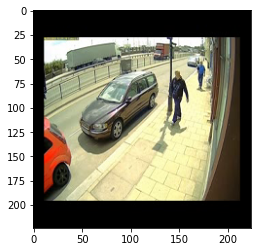

In [9]:
plt.imshow(visible_frame[75])

In [10]:
labels = [[1,0], [0,1]]

In [15]:
# use the model
transfer_layer = vgg_loaded_model.get_layer('fc2')

image_model_transfer = Model(inputs=vgg_loaded_model.input,
                             outputs=transfer_layer.output)

label_pred = image_model_transfer.predict(visible_frame)

In [17]:
image_model_transfer.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [18]:
lstm_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               9439232   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25650     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

In [36]:
predictions = image_model_transfer.predict(visible_frame)
score = lstm_loaded_model.predict(np.array(predictions))
plt.imshow(visible_frame[i])
print(predictions[i].shape)
print(score)    

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 4096)


In [32]:
print(predictions[1][1])


0.6368386
